# Prereading study storyline
## Loading the data

In [294]:
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import sys
import getpass
import math

In [295]:
# from scipy import stats 
dfraw = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_160217_JBS_removed_empty_columns.csv')
dfsurvey = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_addSurvey_160309_JBS_removed_empty_columns.csv')
#please read this about unicode strings eventually: http://www.joelonsoftware.com/articles/Unicode.html


# Klugetastic: make a list, convert to an array and then a df
datalist = []
#header = df.keys()
topics = ['Blackbody','Masses','Resonance']
treatments = ['TextThenPhet','TextOnly','PhetThenText']


#merge with main dataframe
dfmerged = pd.merge(left=dfraw,right=dfsurvey, left_on='anon-id', right_on='anon-id')

phetquestion = {'Blackbody':'q01 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Masses':'q5 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Resonance':'q6 - Approximately how long did you spend with the PhET simulation? (in minutes)'}
textquestion = {'Blackbody':'q02 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Masses':'q6 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Resonance':'q7 - Approximately how long did you spend reading the textbook sections? (in minutes)'}

conv_pos = {'nan':np.nan, 'Not at all':0.0, 'Somewhat':1.0, 'Mostly':2.0, 'Definitely':3.0}
conv_neg = {'nan':np.nan, 'Not at all':3.0, 'Somewhat':2.0, 'Mostly':1.0, 'Definitely':0.0}

encountered_question = {'Blackbody':'q03 -  Have you learned about blackbody radiation before? (Choose all that apply.)',
                        'Masses':'q7 - Have you learned about simple harmonic motion before? (Choose all that apply.)',
                        'Resonance':'q8 - Have you learned about resonance before? (Choose all that apply.)'}

def transform_encountered(response):
    response = str(response)
    if response == 'No.':
        return False
    if 'Yes' in response:
        return True
    else: 
        return np.nan

#now we iterate through the dataframe and creat a row per student x topic
for index, row in dfmerged.iterrows():
    for topic in topics:
        #print row['q5 - For me personally; PhET Sims are usually useless.']
        calculated_survey = (float(conv_neg[str(row['q2 - For me personally; PhET Sims are usually boring.']).split('<')[0]])+
                    float(conv_neg[str(row['q5 - For me personally; PhET Sims are usually useless.']).split('<')[0]])+
                    float(conv_pos[str(row['q4 - For me personally; PhET Sims are usually fun.']).split('<')[0]])+
                    float(conv_pos[str(row['q3 - For me personally; PhET Sims are usually productive.']).split('<')[0]]))/4.0
        datalist.append([str(row['anon-id']),
                        str(row["Reading group_x"]),
                        float(str(row['PreScore.'+topic]).replace('%',''))/100.0,
                        topic,
                        row['Treatment.'+topic+'_x'],
                        float(str(row['PostScore.'+topic]).replace('%',''))/100.0,
                        float(str(row['ClickerScore.'+topic]).replace('%',''))/100.0,
                        row[textquestion[topic]],
                        row[phetquestion[topic]],
                        calculated_survey,
                        row['q9 - How beneficial was this assignment to your learning?'],
                        row['q10 - How much did you enjoy this assignment?'],
                        transform_encountered(row[encountered_question[topic]])
                        ])

# convert list2 to an array then a dataframe
array2 = np.array(datalist)
colnames = ['student id',"Reading group",'Prescore','Topic','Treatment',
            'Postscore','Clickerscore','Time on text','Time on PhET',
            'Preattitude','Postattitude - benefitted','Postattitude - enjoyed','Encountered']

# Organizing the dataframe
#### Now that we have our data frame we can see what it looks like:

In [296]:
df

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Preattitude,Postattitude - benefitted,Postattitude - enjoyed,Encountered,Benefitted,Enjoyed
0,5963,3,NaN,Blackbody,TextOnly,1.00,0.67,NaN,NaN,nan,Not very beneficial.,Somewhat enjoyed it.,nan,False,True
1,5963,3,NaN,Masses,TextThenPhet,1.00,1.00,25.0,7.0,nan,Not very beneficial.,Somewhat enjoyed it.,True,False,True
2,5963,3,NaN,Resonance,PhetThenText,0.67,0.33,20.0,6.0,nan,Not very beneficial.,Somewhat enjoyed it.,True,False,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,NaN,NaN,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan,True,True
4,25630,1,0.00,Masses,TextOnly,0.00,0.75,20.0,0.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,True,True,True
5,25630,1,1.00,Resonance,TextThenPhet,0.67,0.00,20.0,10.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,True,True,True
6,41441,1,0.67,Blackbody,PhetThenText,0.67,0.67,NaN,NaN,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan,True,True
7,41441,1,0.00,Masses,TextOnly,0.00,0.75,30.0,0.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,False,True,True
8,41441,1,0.67,Resonance,TextThenPhet,0.33,0.00,15.0,8.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,False,True,True
9,51900,1,0.33,Blackbody,PhetThenText,1.00,0.67,NaN,NaN,nan,nan,nan,nan,NaN,NaN


#### First we want to make sure that the columns containing numerical data are treated as such. Let's also collapse the post attitude columns

In [297]:
#converting columns to numerical types
for column in ['Prescore','Postscore','Clickerscore', 'Time on text','Time on PhET']:
    df[column] = pd.to_numeric(df[column],errors='coerce')
df = df.fillna(np.nan)

def transform_enjoy(response):
    response = str(response)
    if 'No' in response or 'not' in response:
        return False
    elif 'enjoy' in response: 
        return True
    else: return np.nan
    
def transform_benefit(response):
    response = str(response)
    if 'Not' in response:
        return False
    elif 'beneficial' in response: 
        return True
    else: return np.nan
    
df['Benefitted'] = df['Postattitude - benefitted'].apply(transform_benefit)
df['Enjoyed'] = df['Postattitude - enjoyed'].apply(transform_enjoy)

Unfortunately we have a lot of rows with missing data. If we remove them, we end up with almost half the dataset. We will use this dataset when looking at engagement.

In [298]:
df2 = df.dropna()
df2.shape, df.shape

((531, 15), (1533, 15))

In [299]:
df.describe()

,Prescore,Postscore,Clickerscore,Time on text,Time on PhET
count,1347.000000,1304.000000,1352.000000,864.000000,876.000000
mean,0.311737,0.462247,0.604179,34.407986,6.804795
std,0.306952,0.340434,0.311993,28.948859,9.742609
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.330000,0.330000,15.000000,0.000000
50%,0.330000,0.330000,0.670000,30.000000,5.000000
75%,0.500000,0.670000,1.000000,45.000000,10.000000
max,1.000000,1.000000,1.000000,300.000000,180.000000


# Descriptors
## Did the students learn?
#### Let's get a sense of what the students were doing. First let's compare their pre and post scores. In these boxplots, means are in green and medians in red.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AD1E8D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001AC0DDA0>], dtype=object)

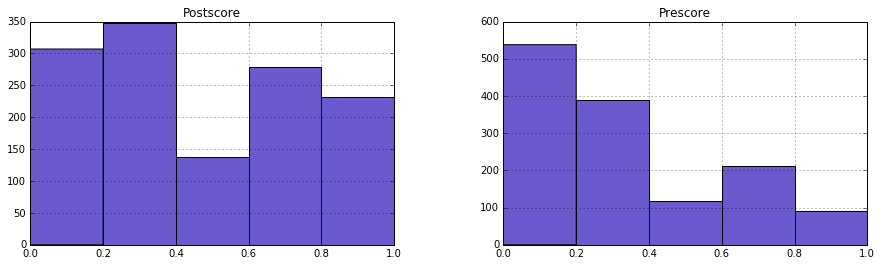

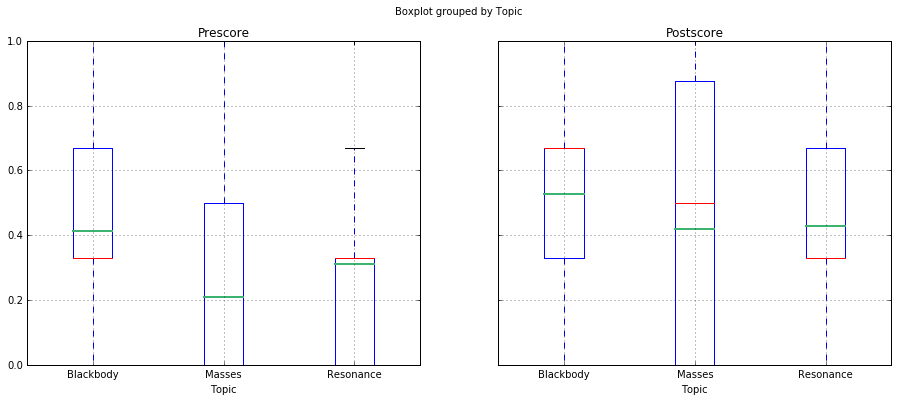

In [300]:
df.hist(column=['Prescore','Postscore'],bins=5, layout=(1,2),figsize=(15,4),color='slateblue')
meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df.boxplot(by='Topic',
                column=['Prescore','Postscore'],
                figsize=(15,6),
                meanprops=meanlineprops, meanline=True, showmeans=True)

We can see from the histograms that we a wide spectrum of knowledge levels. The boxplots confirm that the student did indeed learn, as post-scores increased for all topics though in varying amounts per topic. We do a Mann-Whitney test (the equivalent a simple t-test for non normal data) to find out if the difference in score is significant.

In [301]:
from scipy.stats import mannwhitneyu
m = mannwhitneyu(df[df['Topic']=='Masses']['Prescore'],df[df['Topic']=='Masses']['Postscore'])
r = mannwhitneyu(df[df['Topic']=='Resonance']['Prescore'],df[df['Topic']=='Resonance']['Postscore'])
b = mannwhitneyu(df[df['Topic']=='Blackbody']['Prescore'],df[df['Topic']=='Blackbody']['Postscore'])
print("The significance of the post score difference is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The significance of the post score difference is:
MannwhitneyuResult(statistic=95307.0, pvalue=2.2123823670513139e-15) for Masses, 
MannwhitneyuResult(statistic=98824.0, pvalue=3.5489988668011413e-12) for Resonance, 
MannwhitneyuResult(statistic=116252.0, pvalue=0.001570114610541258) for Blackbody


## How much were they engaged in the activity?
#### Next we look at the time spent on task. Next let's look at how much time they spent on each activity.

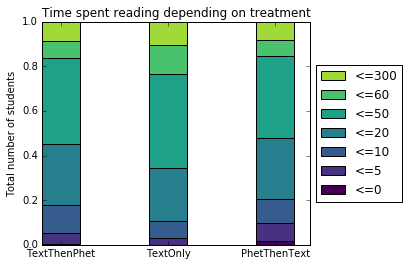

In [302]:
slices = [0,5,10,20,50,60,300]

def calculate_totals(time,treatment):
    return sum(df[df['Treatment']==treatment]['Time on text']<=time)/float(sum(df[df['Treatment']==treatment]['Time on text']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent reading depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

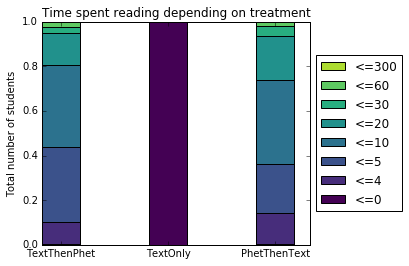

In [303]:
slices = [0,4,5,10,20,30,60,300]

def calculate_totals(time,treatment):
    return sum(df[df['Treatment']==treatment]['Time on PhET']<=time)/float(sum(df[df['Treatment']==treatment]['Time on PhET']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent reading depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

In [304]:
p = mannwhitneyu(df[df['Treatment']=='TextThenPhet']['Time on PhET'],df[df['Treatment']=='PhetThenText']['Time on PhET'])
t = mannwhitneyu(df[df['Treatment']=='TextThenPhet']['Time on text'],df[df['Treatment']=='PhetThenText']['Time on text'])
print("The significance of difference between time on task of conditions PhetThenText and TextThenPhet:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions PhetThenText and TextThenPhet:
MannwhitneyuResult(statistic=104747.0, pvalue=0.98307411002794387) for Phet, 
MannwhitneyuResult(statistic=107757.0, pvalue=0.46439842056534641) for text


## Prior and knowledge and attitude influence on engagement
#### If they already encountered the topic were they more likely to score well on the pretest?

In [305]:
m0 = mannwhitneyu(df2[df2['Encountered']=='False']['Prescore'],df2[df2['Encountered']=='True']['Prescore'])
print("The significance of difference between having encountered the topic and on prescore {0}".format(m0))

The significance of difference between having encountered the topic and on prescore MannwhitneyuResult(statistic=30962.5, pvalue=0.0096002869873254102)


#### If they already encountered the topic were they more likely to be engaged?¶

In [306]:
## aDD CORRELATIONS HERE

#### If they enjoyed the activity, were they more likely to be engaged?
#### If they benefitted from the activity, were they more likely to be engaged?

In [307]:
## ADD CORRELATIONS HERE

# Performance analysis by engagement
## Visual investigation of effect of engagement

In [308]:
##show line plots with x = pre to post, colored by condition, grouped by engagement level

## Postscore analysis with engagement * condition interaction term
#### Next let's group by engagement and see if there is a different in performance.


In [309]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = '''df2["Postscore"] ~ df2["Reading group"] + 
            df2["Prescore"] + df2["Topic"] +
            df2["Treatment"]*df2["Time on text"]*df2["Time on PhET"]'''
glm_f_binom = smf.glm(formula = formula, data = df2,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       df2["Postscore"]   No. Observations:                  531
Model:                            GLM   Df Residuals:                      517
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -342.04
Date:                Fri, 13 May 2016   Deviance:                       630.74
Time:                        17:36:42   Pearson chi2:                     262.
No. Iterations:                     7                                         
                                                                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------------------------------
Interce

In [310]:
phet_median = df2[df2['Treatment']!='TextOnly']['Time on PhET'].median()
df2['Engaged PhET'] = df2[df2['Treatment']!='TextOnly']['Time on PhET'] >= phet_median
text_median = df2['Time on text'].median()
df2['Engaged text'] = df2['Time on text'] >= text_median
'The median engagment times for PhET and text are {0} and {1} minutes.'.format(phet_median,text_median)
def check_engagment(row):
    if row['Treatment']!='TextOnly' and row['Engaged text'] and row['Engaged PhET']:
        val = "Engaged both"
    elif row['Treatment']=='TextOnly' and row['Engaged text']:
        val = "Engaged text only"
    elif row['Treatment']!='TextOnly' and row['Engaged text'] and not row['Engaged PhET']:
        val = "Engaged text only"
    elif row['Treatment']!='TextOnly' and  not row['Engaged text'] and row['Engaged PhET']:
        val = "Engaged xPhET only"
    else:
        val = 'Not engaged'
    return val
df2['Engaged overall'] = df2.apply(check_engagment, axis = 1)

C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [311]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = '''df2["Postscore"] ~ df2["Reading group"] + 
            df2["Prescore"] + df2["Topic"] +
            df2["Treatment"]*df2["Engaged PhET"]*df2["Engaged text"]'''
glm_f_binom = smf.glm(formula = formula, data = df2,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       df2["Postscore"]   No. Observations:                  355
Model:                            GLM   Df Residuals:                      344
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -224.60
Date:                Fri, 13 May 2016   Deviance:                       402.92
Time:                        17:36:43   Pearson chi2:                     176.
No. Iterations:                     7                                         
                                                                                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------------------------------

## Clickerscore analysis with engagement * condition interaction term

In [312]:
formula = '''df2["Clickerscore"] ~ df2["Reading group"] + 
            df2["Prescore"] + df2["Topic"] +
            df2["Treatment"]*df2["Engaged PhET"]*df2["Engaged text"]'''
glm_f_binom = smf.glm(formula = formula, data = df2,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     df2["Clickerscore"]   No. Observations:                  355
Model:                             GLM   Df Residuals:                      344
Model Family:                 Binomial   Df Model:                           10
Link Function:                   logit   Scale:                             1.0
Method:                           IRLS   Log-Likelihood:                -211.26
Date:                 Fri, 13 May 2016   Deviance:                       459.87
Time:                         17:36:43   Pearson chi2:                     113.
No. Iterations:                      7                                         
                                                                                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------------

#### Interestingly, low or no effect by the prescore on the clickerscore... Treatment marginally mattered, engagement didn't.

## Reading assignment and preparedness: what's the difference between the clicker and postscore?
#### To see if the reading material was sufficient to prepare students for class, let's so how differently they performed on the clicker versus post reading quiz.


In [313]:
formula = '''df2["Clickerscore"] ~ df2["Reading group"] + 
            df2["Prescore"] + df2["Postscore"] + df2["Topic"] +
            df2["Treatment"]*df2["Engaged PhET"]*df2["Engaged text"]'''
glm_f_binom = smf.glm(formula = formula, data = df2,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     df2["Clickerscore"]   No. Observations:                  355
Model:                             GLM   Df Residuals:                      343
Model Family:                 Binomial   Df Model:                           11
Link Function:                   logit   Scale:                             1.0
Method:                           IRLS   Log-Likelihood:                -207.80
Date:                 Fri, 13 May 2016   Deviance:                       460.51
Time:                         17:36:43   Pearson chi2:                     108.
No. Iterations:                      7                                         
                                                                                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------------------

#### Postscore had an increasing effect on clickerscore. Apparently, students did really poorly on the Resonance clicker questions (or maybe on question in particular?)